In [3]:
import datetime
import time
import requests
import re
from bs4 import BeautifulSoup
import csv
import os
import string
import io
import numpy as np
import pandas as pd
import matplotlib
#專門做『技術分析』的套件
from talib import abstract
#專門抓台股的套件
import twstock
#製作 Stock_ID
stock_id=pd.read_excel('stock_id.xlsx',dtype=str)
s_id=list((stock_id.iloc[0])) #全部的股票代號
#已買清單
buy_list=list(pd.read_excel('buy_list.xlsx',dtype=str)[0])
##############################################
#過去的推薦買賣股票
try:
    b=pd.read_excel('buy_id.xlsx',dtype={0:str})[0]
except:
    b=[]
try:
    s=pd.read_excel('sell_id.xlsx',dtype={0:str})[0]
except:
    s=[]
buy_last=list(b[:])
sell_last=list(s[:])

sum_buy=0
sum_sell=0
################################################
#設定爬蟲股票代號
s_id=['0050','1219','2480']
buy=[]
sell=[]

for i in s_id:
    sid = i
    #設定爬蟲時間
    start = datetime.datetime.now() - datetime.timedelta(days=180)
    end = datetime.date.today()
    #導入pandas_datareader
    from pandas_datareader import data
    # 與yahoo請求，套件路徑因版本不同
    pd.core.common.is_list_like = pd.api.types.is_list_like
    try:
        stock_dr = data.get_data_yahoo(sid+'.TW', start, end)
    except:
        print(i+" 已經下市\n")
        continue
    stock_dr.columns=['high','low','open','close','volume','adj close']
    
    ####################################################################
    if stock_dr.iloc[-1].open < 3000 and stock_dr.iloc[-1].volume>5000000:  #取價格小於 50000,且量大於500ㄋ 
        #accuracy
        if i in buy_last:
            if stock_dr.iloc[-1].open <  stock_dr.iloc[-1].close:
                sum_buy+=1
        if i in sell_last:
            if stock_dr.iloc[-1].open >  stock_dr.iloc[-1].close:
                sum_sell+=1        
        
        #收盤價
        #df['close'].plot(figsize=(16, 8))
        # KD
        # kd=abstract.STOCH(stock_dr)
        # abstract.STOCH(stock_dr).plot(figsize=(16, 8))
        #MACD

        macd=abstract.MACD(stock_dr)
        
        #畫圖
        #abstract.MACD(stock_dr).plot(figsize=(16, 8)) 
        #stock_dr['close'].plot(secondary_y=True)
        cross=macd.iloc[-3:]
        #找交叉
        for j in range(len(cross)-1):
            #print(j)
            if cross.macd.iloc[j] > cross.macdsignal.iloc[j] and cross.macd.iloc[j+1] < cross.macdsignal.iloc[j+1] :
                #print(' -  : ',cross.index[j])
                if i in buy_list:
                    sell+=[i+'***',' - ',cross.index[j]]
                else:
                    sell+=[i,' - ',cross.index[j]]
            elif cross.macd.iloc[j] < cross.macdsignal.iloc[j] and cross.macd.iloc[j+1] > cross.macdsignal.iloc[j+1] :
                #print(' +  : ',cross.index[j])
                buy+=[i,' + ',cross.index[j]]
#print('buy : ',buy)
#print('sell : ',sell)
buy_id=[]
sell_id=[]
for i in range(len(buy)):
    if i % 3==0:
        buy_id+=[buy[i]]
for i in range(len(sell)):
    if i % 3==0:
        sell_id+=[sell[i]]
print('buy : ',buy_id)
print('\n')
print('sell : ',sell_id)
print('#################################################################################')
print('Accuracy')
try:
    print('Buy : ',sum_buy/len(buy_last))
    print('Sell : ',sum_sell/len(sell_last))
except:
    print("尚未有買賣紀錄")
buy_id_pd=pd.DataFrame(buy_id)
sell_id_pd=pd.DataFrame(sell_id)
buy_id_pd.to_excel('buy_id.xlsx',index=False)
sell_id_pd.to_excel('sell_id.xlsx',index=False)

buy :  []


sell :  []
#################################################################################
Accuracy
尚未有買賣紀錄


In [134]:
cross

,macd,macdsignal,macdhist
Date,,,
2021-02-24,2.666915,2.839188,-0.172273
2021-02-25,2.540688,2.779488,-0.238800
2021-02-26,2.081783,2.639947,-0.558164


加入買賣清單，直接輸入股票代碼，輸入-1可離開表單

In [3]:
#buy
buy_list=list(pd.read_excel('buy_list.xlsx',dtype=str)[0])
#sell_list=list(pd.read_excel('sell_list.xlsx',dtype=str))
new_buy_list=[]
while(1):
    x=input('Buy:')
    if x=='-1':
        break
    new_buy_list+=[x]
buy_list=buy_list+new_buy_list
buy_list=pd.DataFrame(buy_list)
buy_list.to_excel('buy_list.xlsx',index=False)

Buy: 0050
Buy: -1


退出買賣清單，直接輸入股票代碼，輸入-1可離開表單

In [17]:
#sell
buy_list=list(pd.read_excel('buy_list.xlsx',dtype=str)[0])
new_sell_list=[]
while(1):
    x=input('Sell:')
    if x=='-1':
        break
    new_sell_list+=[x]
for i in new_sell_list:
    buy_list.remove(i)
buy_list=pd.DataFrame(buy_list)
buy_list.to_excel('buy_list.xlsx',index=False)

Sell: 3049
Sell: -1


查詢個股現況

,high,low,open,close,volume,adj close
Date,,,,,,
2021-02-22,140.750000,138.750000,139.800003,138.800003,6813636,138.800003
2021-02-23,138.699997,136.449997,137.149994,138.500000,7657431,138.500000
2021-02-24,138.199997,136.250000,137.000000,136.449997,10485561,136.449997
2021-02-25,138.149994,136.699997,137.850006,137.550003,10182298,137.550003
2021-02-26,135.199997,133.300003,134.649994,133.399994,27690263,133.399994


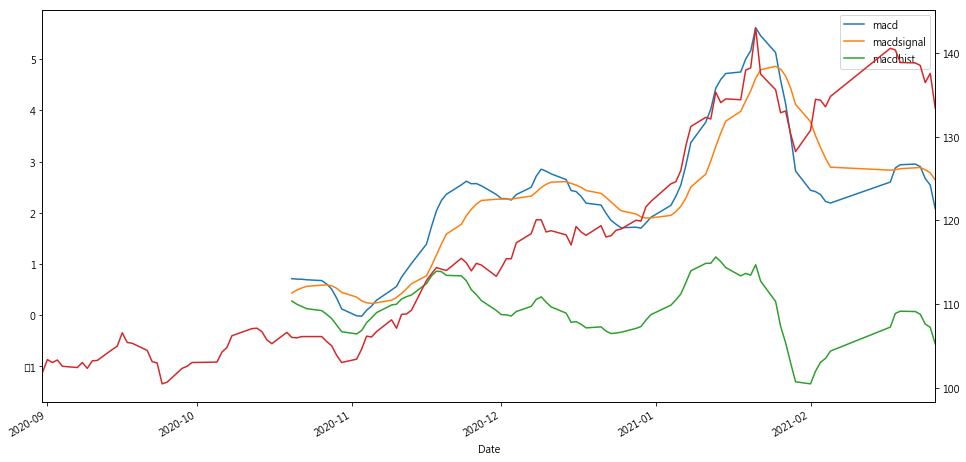

In [11]:
import datetime
import time
import requests
import re
from bs4 import BeautifulSoup
import csv
import os
import string
import io
import numpy as np
import pandas as pd
import matplotlib
#專門做『技術分析』的套件
from talib import abstract
#專門抓台股的套件
import twstock
sid = '0050'
#設定爬蟲時間
start = datetime.datetime.now() - datetime.timedelta(days=180)
end = datetime.date.today()
#導入pandas_datareader
from pandas_datareader import data
# 與yahoo請求，套件路徑因版本不同
pd.core.common.is_list_like = pd.api.types.is_list_like
stock_dr = data.get_data_yahoo(sid+'.TW', start, end)
stock_dr.columns=['high','low','open','close','volume','adj close']
macd=abstract.MACD(stock_dr)
#畫圖
abstract.MACD(stock_dr).plot(figsize=(16, 8)) 
stock_dr['close'].plot(secondary_y=True)
stock_dr.tail()

In [5]:
stock_dr.tail()
macdhist = abstract.MACD(stock_dr, fastperiod=12, slowperiod=26, signalperiod=9)

In [75]:
import inspect
inspect.getsourcelines(data.get_data_yahoo)

(['def get_data_yahoo(*args, **kwargs):\n',
  '    return YahooDailyReader(*args, **kwargs).read()\n'],
 69)

## KD 周線

In [1]:
import datetime
# import numpy as np
import pandas as pd
# import matplotlib
#專門做『技術分析』的套件
from talib import abstract
#專門抓台股的套件
# import twstock
# import base64
from email.mime.text import MIMEText

#製作 Stock_ID
st_data = pd.read_excel('stock_id_00.xlsx',encoding='gbk')
ind=[str(i) for i in list(st_data.num)]
s_name=list(st_data.name)
st_d={}
for i in range(len(ind)):
    st_d[ind[i]]=s_name[i]
    
stock_id=pd.read_excel('stock_id.xlsx',dtype=str)
s_id=list((stock_id.iloc[0])) #全部的股票代號
#已買清單
buy_list=list(pd.read_excel('buy_list.xlsx',dtype=str)[0])
##############################################
#過去的推薦買賣股票
try:
    b=pd.read_excel('buy_id.xlsx',dtype={0:str})[0]
except:
    b=[]
try:
    s=pd.read_excel('sell_id.xlsx',dtype={0:str})[0]
except:
    s=[]
buy_last=list(b[:])
sell_last=list(s[:])

sum_buy=0
sum_sell=0
################################################
#設定爬蟲股票代號
s_id=['0050']
buy=[]
sell=[]

for i in s_id:
    sid = i
    #設定爬蟲時間
    start = datetime.datetime.now() - datetime.timedelta(days=360)
    end = datetime.date.today()
    #導入pandas_datareader
    from pandas_datareader import data
    # 與yahoo請求，套件路徑因版本不同
    pd.core.common.is_list_like = pd.api.types.is_list_like
    try:
        stock_dr = data.get_data_yahoo(sid+'.TW', start, end, interval='w')
    except:
        print(i+" 已經下市")
        continue
    stock_dr.columns=['high','low','open','close','volume','adj close']
    ####################################################################
    if stock_dr.iloc[-1].open < 300 and stock_dr.iloc[-1].volume>5000000:  #取價格小於 50000,且量大於500ㄋ 
        #accuracy
        if i in buy_last:
            if stock_dr.iloc[-1].open <  stock_dr.iloc[-1].close:
                sum_buy+=1
        if i in sell_last:
            if stock_dr.iloc[-1].open >  stock_dr.iloc[-1].close:
                sum_sell+=1        
        
        #收盤價
        #df['close'].plot(figsize=(16, 8))
        # KD
        # kd=abstract.STOCH(stock_dr)
        # abstract.STOCH(stock_dr).plot(figsize=(16, 8))
        #MACD

        kd=abstract.STOCH(stock_dr,fastk=9)
        #畫圖
        #abstract.MACD(stock_dr).plot(figsize=(16, 8)) 
        #stock_dr['close'].plot(secondary_y=True)
        cross=kd.iloc[-3:]
        #找交叉
        for j in range(len(cross)-1):
            #print(j)
            if cross.slowd.iloc[j] > cross.slowk.iloc[j] and cross.slowd.iloc[j+1] < cross.slowk.iloc[j+1] and cross.slowd.iloc[j+1]<30:
                #print(' +  : ',cross.index[j])
                buy+=[i,st_d[i],stock_dr.iloc[-1].open,cross.index[j],' + ']
            elif cross.slowd.iloc[j] < cross.slowk.iloc[j] and cross.slowd.iloc[j+1] > cross.slowk.iloc[j+1] :
                
                #print(' -  : ',cross.index[j])
                if i in buy_list:
                    sell+=[i,st_d[i],stock_dr.iloc[-1].open,cross.index[j],' - ***']
                else:
                    sell+=[i,st_d[i],stock_dr.iloc[-1].open,cross.index[j],' - ']
#print('buy : ',buy)
#print('sell : ',sell)
buy_id=[]
sell_id=[]
for i in range(len(buy)):
    if i % 5==0:
        buy_id+=[[buy[i],buy[i+1],buy[i+2]]]
for i in range(len(sell)):
    if i % 5==0:
        sell_id+=[[sell[i],sell[i+1],sell[i+2]]]
print('buy : ',buy_id)
print('\n')
print('sell : ',sell_id)
print('#################################################################################')
print('Accuracy')
try:
    print('Buy : ',sum_buy/len(buy_last))
    print('Sell : ',sum_sell/len(sell_last))
except:
    print("尚未有買賣紀錄")
buy_id_pd=pd.DataFrame(buy_id)
sell_id_pd=pd.DataFrame(sell_id)
buy_id_pd.to_excel('buy_id.xlsx',index=False)
sell_id_pd.to_excel('sell_id.xlsx',index=False)

##############################################################
#寄信
import smtplib
smtp=smtplib.SMTP('smtp.gmail.com', 587)
smtp.ehlo()
smtp.starttls()
smtp.login('hsustock12345@gmail.com','Qaz78900')

#寄/收件人
from_addr='hsustock12345@gmail.com'
to_addr=['hsusean1219@gmail.com','stevenlinlyc860415@gmail.com','spencer8005@yahoo.com.tw','davidlv7621@yahoo.com.tw','anderson831208@gmail.com']
# to_addr=['hsusean1219@gmail.com','Jeremy.Hsu@sti.com.tw']
# to_addr=['hsusean1219@gmail.com']

#推薦名單
recommend_buy = buy_id
recommend_sell = sell_id

#編輯內文
msg=""
msg+="Buy\n"
if len(recommend_buy)==0:
    msg+="None!!\n\n"
else:
    for i in recommend_buy:
        if i == recommend_buy[-1]:
            msg+= i[0]+' '+i[1]+" Price "+ str(round(i[2],2))+" !\n\n"
        else:
            msg+= i[0]+' '+i[1]+" Price "+ str(round(i[2],2))+",\n"
msg+="Sell\n"
if len(recommend_sell)==0:
    msg+="None!!\n\n"
else:
    for i in recommend_sell:
        if i == recommend_sell[-1]:
            msg+= i[0]+' '+i[1]+" Price "+ str(round(i[2],2))+" !\n\n"
        else:
            msg+= i[0]+' '+i[1]+" Price "+ str(round(i[2],2))+",\n"
            
#輸入內容
text = MIMEText(msg, 'plain', 'utf-8')
text['From'] = u'台灣巴菲哲'
text['Subject'] =u'自動報明牌系統'

#寄信        
for k in to_addr:
    status=smtp.sendmail(from_addr, k, text.as_string())#加密文件，避免私密信息被截取 發現信的內容不能有":"            

#確認
if status=={}:
    print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')+"  郵件傳送成功!")
else:
    print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')+"  郵件傳送失敗!")
smtp.quit()

buy :  []


sell :  [['0050', '元大台灣50', 134.35000610351562]]
#################################################################################
Accuracy
尚未有買賣紀錄
2021-03-05 00:41:39  郵件傳送成功!


(221, b'2.0.0 closing connection d6sm2319168pfq.109 - gsmtp')

In [107]:
#寄信
import smtplib
from datetime import datetime
smtp=smtplib.SMTP('smtp.gmail.com', 587)
smtp.ehlo()
smtp.starttls()
smtp.login('hsustock12345@gmail.com','Qaz78900')

#寄/收件人
from_addr='hsustock12345@gmail.com'
# to_addr=['hsusean1219@gmail.com','stevenlinlyc860415@gmail.com','spencer8005@yahoo.com.tw']
to_addr=['hsusean1219@gmail.com','Jeremy.Hsu@sti.com.tw']
# to_addr=['hsusean1219@gmail.com']

#推薦名單
recommend_buy = buy_id
recommend_sell = sell_id

#輸入內容
msg="Subject:Auto Recommanded Stock\n"
msg+="Buy\n"
if len(recommend_buy)==0:
    msg+="None!!\n\n"
else:
    for i in recommend_buy:
        if i == recommend_buy[-1]:
            msg+= i[0]+" Price "+ str(i[1])+" !\n\n"
        else:
            msg+= i[0]+" Price "+ str(i[1])+",\n"
msg+="Sell\n"
if len(recommend_sell)==0:
    msg+="None!!\n\n"
else:
    for i in recommend_sell:
        if i == recommend_sell[-1]:
            msg+= i[0]+" Price "+ str(i[1])+" !\n\n"
        else:
            msg+= i[0]+" Price "+ str(i[1])+",\n"
        
#寄信        
for k in to_addr:
    status=smtp.sendmail(from_addr, k, msg)#加密文件，避免私密信息被截取 發現信的內容不能有":"
#確認
if status=={}:
    print(datetime.now().strftime('%Y-%m-%d %H:%M:%S')+"  郵件傳送成功!")
else:
    print(datetime.now().strftime('%Y-%m-%d %H:%M:%S')+"  郵件傳送失敗!")
smtp.quit()

2021-03-03 00:53:58  郵件傳送成功!


(221, b'2.0.0 closing connection gf20sm4127357pjb.39 - gsmtp')

查詢勝率

股票代號: 0050
盈餘:  30950.00457763672 元(以1張為單位)
買進日期:  [Timestamp('2020-06-22 00:00:00'), Timestamp('2020-09-28 00:00:00'), Timestamp('2020-11-02 00:00:00'), Timestamp('2020-12-21 00:00:00'), Timestamp('2021-02-17 00:00:00')]
賣出日期:  [Timestamp('2020-06-01 00:00:00'), Timestamp('2020-07-13 00:00:00'), Timestamp('2020-10-19 00:00:00'), Timestamp('2020-12-07 00:00:00'), Timestamp('2021-01-04 00:00:00'), Timestamp('2021-02-22 00:00:00')]


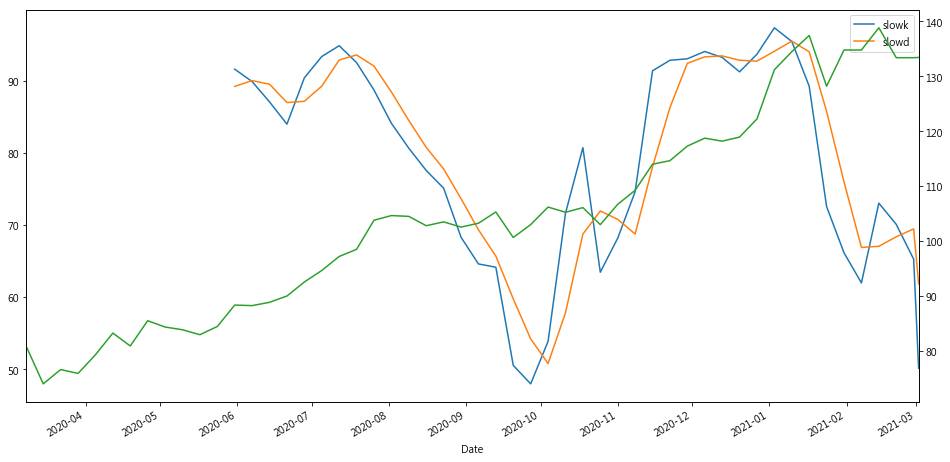

In [36]:
sid = '0050'
start = datetime.datetime.now() - datetime.timedelta(days=360)
end = datetime.date.today()
stock_dr_d = data.get_data_yahoo(sid+'.TW', start, end, interval="d")
stock_dr_w = data.get_data_yahoo(sid+'.TW', start, end, interval="w")
stock_dr_d.columns=['high','low','open','close','volume','adj close']
stock_dr_w.columns=['high','low','open','close','volume','adj close']
kd=abstract.STOCH(stock_dr_w,fastk=9)
kd=kd.dropna()
w_date=list(kd.index[:])
date_pos=[]
date_neg=[]
buy_price=0
earn=0
for i in range(len(w_date)-1):
    #找交叉
#     print(earn)
    if kd.slowd.iloc[i] > kd.slowk.iloc[i] and kd.slowd.iloc[i+1] < kd.slowk.iloc[i+1] :
        while w_date[i] not in stock_dr_d.index:
            w_date[i] += datetime.timedelta(days=1)
        date_pos+=[w_date[i]]
        buy_price=stock_dr_d.loc[w_date[i]].open
    elif kd.slowd.iloc[i] < kd.slowk.iloc[i] and kd.slowd.iloc[i+1] > kd.slowk.iloc[i+1] :
        while w_date[i] not in stock_dr_d.index:
            w_date[i] += datetime.timedelta(days=1)
        date_neg+=[w_date[i]]
        if buy_price==0:
            earn+=0
        else:
            earn += stock_dr_d.loc[w_date[i]].open - buy_price
print("股票代號:", sid)
print("盈餘: ",earn*1000,"元(以1張為單位)")
print("買進日期: ",date_pos)
print("賣出日期: ",date_neg)
abstract.STOCH(stock_dr,fastk_period=9).plot(figsize=(16,8))
stock_dr['close'].plot(secondary_y=True)

自動將推薦個股以 Mail 寄送

In [102]:
from datetime import datetime
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

'2021-03-03 00:17:11'

In [103]:
import smtplib
import time
from datetime import datetime
for i in range(1):
    
    smtp=smtplib.SMTP('smtp.gmail.com', 587)
    smtp.ehlo()
    smtp.starttls()
    smtp.login('hsustock12345@gmail.com','Qaz78900')

    #寄/收件人
    from_addr='hsustock12345@gmail.com'
    # to_addr=['hsusean1219@gmail.com','stevenlinlyc860415@gmail.com','spencer8005@yahoo.com.tw']
    # to_addr=['hsusean1219@gmail.com','Jeremy.Hsu@sti.com.tw']
    to_addr=['hsusean1219@gmail.com']

    #推薦名單
    recommend_buy = [['0050', 135.5],['2480', 1235.5]]
    recommend_sell = [['2465', 12335.5]]

    #輸入內容
    msg="Subject:Auto Recommanded Stock\n"
    msg+="Buy\n"
    if len(recommend_buy)==0:
        msg+="None!!\n\n"
    else:
        for i in recommend_buy:
            if i == recommend_buy[-1]:
                msg+= i[0]+" Price "+ str(i[1])+" !\n\n"
            else:
                msg+= i[0]+" Price "+ str(i[1])+",\n"
    msg+="Sell\n"
    if len(recommend_sell)==0:
        msg+="None!!\n\n"
    else:
        for i in recommend_sell:
            if i == recommend_sell[-1]:
                msg+= i[0]+" Price "+ str(i[1])+" !\n\n"
            else:
                msg+= i[0]+" Price "+ str(i[1])+",\n"

    #寄信        
    for k in to_addr:
        status=smtp.sendmail(from_addr, k, msg)#加密文件，避免私密信息被截取 發現信的內容不能有":"
    if status=={}:
        print(datetime.now().strftime('%Y-%m-%d %H:%M:%S')+"  郵件傳送成功!")
    else:
        print(datetime.now().strftime('%Y-%m-%d %H:%M:%S')+"  郵件傳送失敗!")
    smtp.quit()
    time.sleep(20)

2021-03-03 00:17:39郵件傳送成功!


查詢個股現況

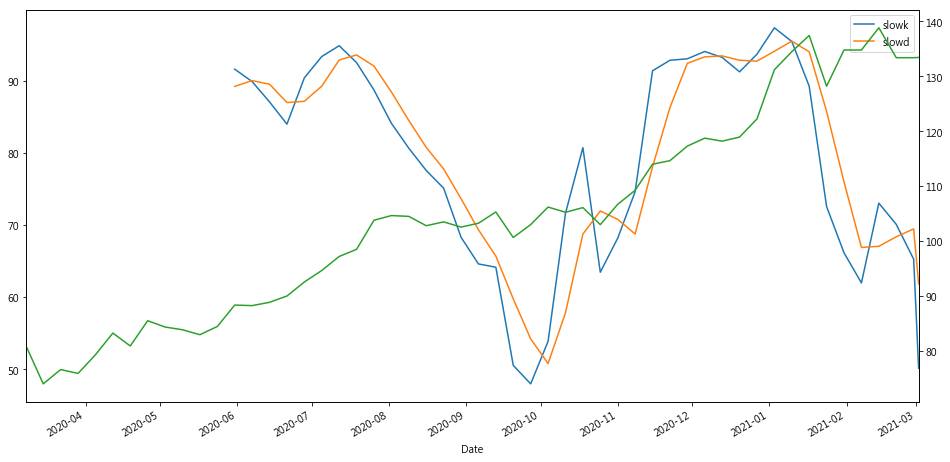

In [35]:
sid = '0050'
#設定爬蟲時間
start = datetime.datetime.now() - datetime.timedelta(days=360)
end = datetime.date.today()
#導入pandas_datareader
from pandas_datareader import data
# 與yahoo請求，套件路徑因版本不同
pd.core.common.is_list_like = pd.api.types.is_list_like
stock_dr = data.get_data_yahoo(sid+'.TW', start, end, interval="w")
stock_dr.columns=['high','low','open','close','volume','adj close']
#調整套件KD的預設值
# print(abstract.STOCH)
# len(stock_dr)
abstract.STOCH(stock_dr,fastk_period=1)
abstract.STOCH(stock_dr,fastk_period=9).plot(figsize=(16,8))
stock_dr['close'].plot(secondary_y=True)

In [ ]:
!pyinstaller -F ./stock_king.py